In [3]:
import pandas as pd
import numpy as np
from collections import Counter
file_path = "drug_reviews_data.csv"

# Load dataset
df = pd.read_csv(file_path, low_memory=False)

print("="*80)
print("DATASET SUMMARY")
print("="*80)
print(f"Rows: {df.shape[0]}  Columns: {df.shape[1]}\n")

print("COLUMN NAMES:")
print(df.columns.tolist())

print("\nDTYPES:")
print(df.dtypes)

print("\nMISSING VALUES (top 20):")
print(df.isna().sum().sort_values(ascending=False).head(20))

print("\nSAMPLE ROWS (first 3):")
with pd.option_context('display.max_colwidth', 200):
    display(df.head(3))

# Basic counts
if "drugName" in df.columns:
    print("\nUnique drugs:", df["drugName"].nunique())
    print("Top 10 drugs:\n", df["drugName"].value_counts().head(10))

if "condition" in df.columns:
    print("\nUnique conditions:", df["condition"].nunique())
    print("Top 10 conditions:\n", df["condition"].value_counts().head(10))

# Detect likely text columns
text_cols = [c for c in df.columns if df[c].dtype == object]
likely_text = [c for c in text_cols if any(k in c.lower() for k in ["review","comment","benefit","side","effect","overall"])]
print("\nDETECTED TEXT COLUMNS:", likely_text)

for c in likely_text:
    s = df[c].fillna("").astype(str)
    lens = s.map(len)
    print(f"\nColumn: {c}")
    print("  Avg length:", lens.mean())
    print("  Median length:", lens.median())
    print("  Min/Max length:", lens.min(), "/", lens.max())
    print("  Sample values:")
    with pd.option_context('display.max_colwidth', 200):
        display(s.head(3))

# Detect ratings
rating_cols = [c for c in df.columns if any(k in c.lower() for k in ["rating","effectiveness","sideeffect","satisfaction"])]
print("\nRATING-LIKE COLUMNS:", rating_cols)

for c in rating_cols:
    vals = pd.to_numeric(df[c], errors="coerce")
    print(f"\n{c} distribution:")
    print(vals.value_counts().sort_index().head(10))
    print("Mean / Median / Std:", vals.mean(), vals.median(), vals.std())


DATASET SUMMARY
Rows: 4143  Columns: 9

COLUMN NAMES:
['urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview', 'target']

DTYPES:
urlDrugName           object
rating                 int64
effectiveness         object
sideEffects           object
condition             object
benefitsReview        object
sideEffectsReview     object
commentsReview        object
target               float64
dtype: object

MISSING VALUES (top 20):
target               4143
sideEffectsReview      98
benefitsReview         23
commentsReview         13
condition               1
urlDrugName             0
sideEffects             0
rating                  0
effectiveness           0
dtype: int64

SAMPLE ROWS (first 3):


,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,target
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dysfunction into overt heart failure \r\n\r\nalone or with other agents in the managment of hypertension \r\n\r\nmangagement of congestive heart failur,"cough, hypotension , proteinuria, impotence , renal failure , angina pectoris , tachycardia , eosinophilic pneumonitis, tastes disturbances , anusease anorecia , weakness fatigue insominca weakness","monitor blood pressure , weight and asses for resolution of fluid",NaN
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,"Although this type of birth control has more cons than pros, it did help with my cramps. It's also effective with the prevention of pregnancy. (Along with use of condoms as well)","Heavy Cycle, Cramps, Hot Flashes, Fatigue, Long Lasting Cycles. It's only been 5 1/2 months, but i'm concidering changing to a different bc. This is my first time using any kind of bc, unfortunate...","I Hate This Birth Control, I Would Not Suggest This To Anyone.",NaN
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,"I was used to having cramps so badly that they would leave me balled up in bed for at least 2 days. The Ponstel doesn't take the pain away completely, but takes the edge off so much that normal a...",Heavier bleeding and clotting than normal.,"I took 2 pills at the onset of my menstrual cramps and then every 8-12 hours took 1 pill as needed for about 3-4 days until cramps were over. If cramps are bad, make sure to take every 8 hours on ...",NaN



Unique conditions: 1807
Top 10 conditions:
 condition
depression             302
acne                   211
anxiety                 90
insomnia                75
birth control           68
high blood pressure     62
allergies               49
migraine                44
asthma                  41
add                     41
Name: count, dtype: int64

DETECTED TEXT COLUMNS: ['effectiveness', 'sideEffects', 'benefitsReview', 'sideEffectsReview', 'commentsReview']

Column: effectiveness
  Avg length: 18.202027516292542
  Median length: 20.0
  Min/Max length: 11 / 22
  Sample values:


,effectiveness
0,Highly Effective
1,Highly Effective
2,Highly Effective



Column: sideEffects
  Avg length: 18.217958001448228
  Median length: 17.0
  Min/Max length: 15 / 29
  Sample values:


,sideEffects
0,Mild Side Effects
1,Severe Side Effects
2,No Side Effects



Column: benefitsReview
  Avg length: 207.76538740043446
  Median length: 159.0
  Min/Max length: 0 / 2296
  Sample values:


,benefitsReview
0,slowed the progression of left ventricular dysfunction into overt heart failure \r\n\r\nalone or with other agents in the managment of hypertension \r\n\r\nmangagement of congestive heart failur
1,"Although this type of birth control has more cons than pros, it did help with my cramps. It's also effective with the prevention of pregnancy. (Along with use of condoms as well)"
2,"I was used to having cramps so badly that they would leave me balled up in bed for at least 2 days. The Ponstel doesn't take the pain away completely, but takes the edge off so much that normal a..."



Column: sideEffectsReview
  Avg length: 181.03741250301715
  Median length: 121.0
  Min/Max length: 0 / 2551
  Sample values:


,sideEffectsReview
0,"cough, hypotension , proteinuria, impotence , renal failure , angina pectoris , tachycardia , eosinophilic pneumonitis, tastes disturbances , anusease anorecia , weakness fatigue insominca weakness"
1,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Long Lasting Cycles. It's only been 5 1/2 months, but i'm concidering changing to a different bc. This is my first time using any kind of bc, unfortunate..."
2,Heavier bleeding and clotting than normal.



Column: commentsReview
  Avg length: 278.4395365677046
  Median length: 206.0
  Min/Max length: 0 / 3859
  Sample values:


,commentsReview
0,"monitor blood pressure , weight and asses for resolution of fluid"
1,"I Hate This Birth Control, I Would Not Suggest This To Anyone."
2,"I took 2 pills at the onset of my menstrual cramps and then every 8-12 hours took 1 pill as needed for about 3-4 days until cramps were over. If cramps are bad, make sure to take every 8 hours on ..."



RATING-LIKE COLUMNS: ['rating', 'effectiveness', 'sideEffects', 'sideEffectsReview']

rating distribution:
rating
1     420
2     136
3     195
4     151
5     226
6     215
7     471
8     748
9     613
10    968
Name: count, dtype: int64
Mean / Median / Std: 6.946415640839971 8.0 2.9488683092384784

effectiveness distribution:
Series([], Name: count, dtype: int64)
Mean / Median / Std: nan nan nan

sideEffects distribution:
Series([], Name: count, dtype: int64)
Mean / Median / Std: nan nan nan

sideEffectsReview distribution:
Series([], Name: count, dtype: int64)
Mean / Median / Std: nan nan nan


In [3]:
# Full preprocessing pipeline for drug reviews
# Run in Colab/Jupyter. Change INPUT_CSV to your file path if needed.

INPUT_CSV = "drug_reviews_data.csv"   # <- update if your file is named differently
OUTPUT_CSV = "drug_reviews_processed.csv"
SUMMARY_JSON = "preprocess_summary.json"

import re
import json
import pandas as pd
import numpy as np
from collections import Counter

# --- NLP tools (use simple tokenizer + lemmatizer to avoid punkt problems) ---
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
# -------------------------
# Helper mapping functions
# -------------------------
def map_effectiveness(raw):
    if pd.isna(raw):
        return np.nan
    s = str(raw).strip().lower()
    if "high" in s or "very effective" in s:
        return 3
    if ("no" in s and "effect" in s) or "ineffective" in s or "not effective" in s:
        return 0
    if "moder" in s or "marginal" in s or "slight" in s or "mildly" in s:
        return 1
    if "effective" in s:
        return 2
    # fallback numeric extraction
    try:
        val = int(re.sub(r'\D', '', s))
        return val
    except Exception:
        return np.nan

def map_sideeffects(raw):
    if pd.isna(raw):
        return np.nan
    s = str(raw).strip().lower()
    if "no side" in s or s.startswith("no "):
        return 0
    if "mild" in s and "side" in s or "mild" in s:
        return 1
    if "moderate" in s or "moderately" in s:
        return 2
    if "severe" in s or "extreme" in s or "horrible" in s:
        return 3
    try:
        val = int(re.sub(r'\D', '', s))
        return val
    except Exception:
        return np.nan

# -------------------------
# Text cleaning function
# -------------------------
def clean_text_simple(text):
    if pd.isna(text):
        return ""
    s = str(text).lower()
    s = s.replace("\r\n", " ").replace("\n", " ").replace("\t", " ")
    s = re.sub(r"https?\S+", " ", s)              # remove URLs
    s = re.sub(r"[^a-z\s']", " ", s)              # keep letters & apostrophes
    s = re.sub(r"\s+", " ", s).strip()
    if not s:
        return ""
    toks = s.split()
    toks = [t for t in toks if t not in STOPWORDS and len(t) > 1]
    lem = [lemmatizer.lemmatize(t) for t in toks]
    return " ".join(lem)

# -------------------------
# Fast VADER scoring (Option A)
# -------------------------
def vader_scores_for_series(series):
    """
    series: pd.Series of strings
    returns tuple of (compound_series, neg_series, pos_series, neu_series)
    Scores computed only for unique text values and mapped back.
    """
    texts = series.fillna("").astype(str)
    unique_texts = pd.unique(texts)
    # compute once per unique value
    scores_map = {}
    for t in tqdm(unique_texts, desc="Scoring unique texts"):
        scores_map[t] = sia.polarity_scores(t)
    # map back to full series
    compound = texts.map(lambda t: scores_map[t]['compound'])
    neg = texts.map(lambda t: scores_map[t]['neg'])
    pos = texts.map(lambda t: scores_map[t]['pos'])
    neu = texts.map(lambda t: scores_map[t]['neu'])
    return compound, neg, pos, neu

# -------------------------
# Load dataset
# -------------------------
print("Loading:", INPUT_CSV)
df = pd.read_csv(INPUT_CSV, low_memory=False)
orig_cols = df.columns.tolist()
print("Initial shape:", df.shape)
print("Columns:", orig_cols)

# Drop empty 'target' column if present and entirely NaN
if 'target' in df.columns and df['target'].isna().all():
    df = df.drop(columns=['target'])

# -------------------------
# Map categorical labels to numeric
# -------------------------
if 'effectiveness' in df.columns:
    df['effectiveness_mapped'] = df['effectiveness'].apply(map_effectiveness)
else:
    df['effectiveness_mapped'] = np.nan

if 'sideEffects' in df.columns:
    df['sideEffects_mapped'] = df['sideEffects'].apply(map_sideeffects)
else:
    df['sideEffects_mapped'] = np.nan

# -------------------------
# Ensure all_reviews exists (concatenate if needed)
# -------------------------
text_fields = ['benefitsReview', 'sideEffectsReview', 'commentsReview']
for tf in text_fields:
    if tf not in df.columns:
        df[tf] = ""

if 'all_reviews' not in df.columns:
    df['all_reviews'] = df['benefitsReview'].fillna("").astype(str) + " " + df['sideEffectsReview'].fillna("").astype(str) + " " + df['commentsReview'].fillna("").astype(str)

# -------------------------
# Clean text columns (create _clean columns)
# -------------------------
cols_to_clean = ['benefitsReview', 'sideEffectsReview', 'commentsReview', 'all_reviews']
for c in cols_to_clean:
    clean_col = c + "_clean"
    print("Cleaning:", c, "->", clean_col)
    df[clean_col] = df[c].astype(str).apply(clean_text_simple)

# -------------------------
# Fast VADER scoring on cleaned text (Option A)
# prefer cleaned columns (shorter) for speed
# -------------------------
cols_to_score = ['benefitsReview','sideEffectsReview','commentsReview','all_reviews']
for base_col in cols_to_score:
    if base_col not in df.columns:
        continue
    src_col = base_col + "_clean" if (base_col + "_clean") in df.columns else base_col
    print("\nScoring VADER for:", base_col, "(using source:", src_col, ")")
    comp, neg, pos, neu = vader_scores_for_series(df[src_col])
    df[f"{base_col}_vader_compound"] = comp
    df[f"{base_col}_vader_neg"] = neg
    df[f"{base_col}_vader_pos"] = pos
    df[f"{base_col}_vader_neu"] = neu
    print("Done. Sample compound stats:")
    print(df[f"{base_col}_vader_compound"].describe())

# -------------------------
# Add simple length/wordcount features
# -------------------------
for c in cols_to_score:
    if c in df.columns:
        df[f"{c}_char_len"] = df[c].astype(str).map(len)
        df[f"{c}_word_count"] = df[c].astype(str).apply(lambda s: len([t for t in s.split() if t.strip()!='']))

# -------------------------
# Ratings and satisfied label
# -------------------------
if 'rating' in df.columns:
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    df['satisfied'] = (df['rating'] >= 7).astype(int)
else:
    df['satisfied'] = np.nan

# -------------------------
# Finalize processed dataframe and save
# -------------------------
keep_cols = [
    'urlDrugName','condition','rating','satisfied',
    'effectiveness','effectiveness_mapped',
    'sideEffects','sideEffects_mapped',
    'benefitsReview','benefitsReview_clean',
    'sideEffectsReview','sideEffectsReview_clean',
    'commentsReview','commentsReview_clean',
    'all_reviews','all_reviews_clean'
]

# include generated numeric features (vader + lengths)
generated_cols = [c for c in df.columns if any(s in c for s in ['_vader_compound','_vader_pos','_vader_neg','_vader_neu','_char_len','_word_count'])]
keep_cols += generated_cols
keep_cols = [c for c in keep_cols if c in df.columns]

processed_df = df[keep_cols].copy()

processed_df.to_csv(OUTPUT_CSV, index=False)
print("\nSaved processed dataframe to:", OUTPUT_CSV)

# -------------------------
# Save summary JSON
# -------------------------
summary = {
    "rows_original": int(len(df)),
    "columns_original": orig_cols,
    "rows_after": int(processed_df.shape[0]),
    "kept_columns": keep_cols,
    "missing_counts": processed_df.isna().sum().to_dict(),
    "unique_drugs": int(processed_df['urlDrugName'].nunique()) if 'urlDrugName' in processed_df.columns else None,
    "top_conditions": processed_df['condition'].value_counts().head(10).to_dict() if 'condition' in processed_df.columns else None,
    "effectiveness_mapped_distribution": processed_df['effectiveness_mapped'].value_counts(dropna=False).to_dict() if 'effectiveness_mapped' in processed_df.columns else None,
    "sideEffects_mapped_distribution": processed_df['sideEffects_mapped'].value_counts(dropna=False).to_dict() if 'sideEffects_mapped' in processed_df.columns else None,
    "rating_distribution": processed_df['rating'].value_counts().sort_index().to_dict() if 'rating' in processed_df.columns else None,
    "satisfied_counts": processed_df['satisfied'].value_counts(dropna=False).to_dict() if 'satisfied' in processed_df.columns else None
}

with open(SUMMARY_JSON, "w", encoding="utf-8") as fh:
    json.dump(summary, fh, indent=2, ensure_ascii=False)

# Print concise summary
print("="*60)
print("PREPROCESSING COMPLETE")
print("- Rows:", summary["rows_original"])
print("- Kept columns:", len(keep_cols))
print("- Missing counts (top 10):")
for k,v in sorted(summary["missing_counts"].items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"   {k}: {v}")
print("- Top conditions (sample):")
print(summary["top_conditions"])
print("- effectiveness_mapped distribution:")
print(summary["effectiveness_mapped_distribution"])
print("- sideEffects_mapped distribution:")
print(summary["sideEffects_mapped_distribution"])
print("- satisfied class counts:")
print(summary["satisfied_counts"])
print("="*60)

Loading: drug_reviews_data.csv
Initial shape: (4143, 9)
Columns: ['urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview', 'target']
Cleaning: benefitsReview -> benefitsReview_clean
Cleaning: sideEffectsReview -> sideEffectsReview_clean
Cleaning: commentsReview -> commentsReview_clean
Cleaning: all_reviews -> all_reviews_clean

Scoring VADER for: benefitsReview (using source: benefitsReview_clean )


Scoring unique texts: 100%|██████████| 4000/4000 [00:01<00:00, 3823.36it/s]


Done. Sample compound stats:
count    4143.000000
mean        0.059059
std         0.528860
min        -0.987600
25%        -0.361200
50%         0.000000
75%         0.476700
max         0.998100
Name: benefitsReview_vader_compound, dtype: float64

Scoring VADER for: sideEffectsReview (using source: sideEffectsReview_clean )


Scoring unique texts: 100%|██████████| 3611/3611 [00:01<00:00, 2520.59it/s]


Done. Sample compound stats:
count    4143.000000
mean       -0.179205
std         0.438781
min        -0.993700
25%        -0.541250
50%         0.000000
75%         0.000000
max         0.986700
Name: sideEffectsReview_vader_compound, dtype: float64

Scoring VADER for: commentsReview (using source: commentsReview_clean )


Scoring unique texts: 100%|██████████| 4021/4021 [00:01<00:00, 2468.46it/s]


Done. Sample compound stats:
count    4143.000000
mean       -0.003457
std         0.490329
min        -0.996900
25%        -0.340000
50%         0.000000
75%         0.361200
max         0.990800
Name: commentsReview_vader_compound, dtype: float64

Scoring VADER for: all_reviews (using source: all_reviews_clean )


Scoring unique texts: 100%|██████████| 4091/4091 [00:02<00:00, 1453.09it/s]


Done. Sample compound stats:
count    4143.000000
mean       -0.082172
std         0.681500
min        -0.998900
25%        -0.765000
50%        -0.128000
75%         0.599400
max         0.998100
Name: all_reviews_vader_compound, dtype: float64

Saved processed dataframe to: drug_reviews_processed.csv
PREPROCESSING COMPLETE
- Rows: 4143
- Kept columns: 40
- Missing counts (top 10):
   sideEffectsReview: 98
   benefitsReview: 23
   commentsReview: 13
   condition: 1
   urlDrugName: 0
   rating: 0
   satisfied: 0
   effectiveness: 0
   effectiveness_mapped: 0
   sideEffects: 0
- Top conditions (sample):
{'depression': 302, 'acne': 211, 'anxiety': 90, 'insomnia': 75, 'birth control': 68, 'high blood pressure': 62, 'allergies': 49, 'migraine': 44, 'asthma': 41, 'add': 41}
- effectiveness_mapped distribution:
{3: 1741, 2: 1238, 1: 835, 0: 329}
- sideEffects_mapped distribution:
{1: 1349, 0: 1198, 2: 850, 3: 746}
- satisfied class counts:
{1: 2800, 0: 1343}


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_recall_curve
from scipy import sparse
import lightgbm as lgb
from scipy.sparse import hstack, csr_matrix
from lightgbm import early_stopping, log_evaluation
import joblib


In [7]:
df = pd.read_csv("drug_reviews_processed.csv", low_memory=False)
print("Loaded shape:", df.shape)

# TEXT and numeric columns
TEXT_COL = "all_reviews_clean"
NUMERIC_COLS = [
    "effectiveness_mapped",
    "sideEffects_mapped",
    "benefitsReview_vader_compound",
    "sideEffectsReview_vader_compound",
    "commentsReview_vader_compound",
    "all_reviews_vader_compound",
    "all_reviews_word_count",
    "all_reviews_char_len"
]
NUMERIC_COLS = [c for c in NUMERIC_COLS if c in df.columns]

# Ensure label exists and remove rows with empty text
if 'satisfied' not in df.columns:
    raise ValueError("Column 'satisfied' not found. Run preprocessing first.")
df = df[df[TEXT_COL].notna()].reset_index(drop=True)
y = df['satisfied'].astype(int)

# Train/test split (stratify)
X_text = df[TEXT_COL].astype(str)
X_num = df[NUMERIC_COLS].fillna(0).astype(float)

X_train_text, X_test_text, X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_text, X_num, y, test_size=0.2, random_state=42, stratify=y
)

print("Train/test sizes:", X_train_text.shape[0], X_test_text.shape[0])
print("Numeric features used:", NUMERIC_COLS)


Loaded shape: (4143, 40)
Train/test sizes: 3313 829
Numeric features used: ['effectiveness_mapped', 'sideEffects_mapped', 'benefitsReview_vader_compound', 'sideEffectsReview_vader_compound', 'commentsReview_vader_compound', 'all_reviews_vader_compound', 'all_reviews_word_count', 'all_reviews_char_len']


In [10]:

tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,3), min_df=3)
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf  = tfidf.transform(X_test_text)

print("TF-IDF shape (train):", X_train_tfidf.shape)

X_train_num_sp = csr_matrix(X_train_num.values)
X_test_num_sp  = csr_matrix(X_test_num.values)

X_train_combined = hstack([X_train_tfidf, X_train_num_sp]).tocsr()
X_test_combined  = hstack([X_test_tfidf,  X_test_num_sp]).tocsr()

# names for interpretation (used later)
tfidf_feats = tfidf.get_feature_names_out().tolist()
feature_names = tfidf_feats + NUMERIC_COLS


TF-IDF shape (train): (3313, 16213)


In [12]:


# sample weights to handle class imbalance
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

lgb_clf = lgb.LGBMClassifier(
    objective="binary",
    boosting_type="gbdt",
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    n_jobs=-1,
    random_state=42
)

callbacks = [
    early_stopping(stopping_rounds=50, verbose=False),
    log_evaluation(period=50)
]

print("Fitting LGBMClassifier with callbacks...")
lgb_clf.fit(
    X_train_combined, y_train,
    sample_weight=sample_weights,
    eval_set=[(X_test_combined, y_test)],
    eval_names=['valid'],
    callbacks=callbacks
)

# If this cell runs without error, skip Cell 4 and run Cell 5 next.


Fitting LGBMClassifier with callbacks...
[LightGBM] [Info] Number of positive: 2239, number of negative: 1074
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 51316
[LightGBM] [Info] Number of data points in the train set: 3313, number of used features: 1767
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[50]	valid's binary_logloss: 0.315846
[100]	valid's binary_logloss: 0.300947


LGBMClassifier(learning_rate=0.05, n_estimators=1000, n_jobs=-1,
               objective='binary', random_state=42)

In [14]:
# Determine which model was trained
model_type = None
if 'lgb_clf' in globals():
    model = globals()['lgb_clf']
    model_type = 'sklearn_lgb'
elif 'bst' in globals():
    model = globals()['bst']
    model_type = 'lgbm_bst'
else:
    raise RuntimeError("No trained model found in workspace. Run Cell 3 or Cell 4 first.")

# Predictions & probabilities
if model_type == 'sklearn_lgb':
    y_pred = model.predict(X_test_combined)
    y_pred_proba = model.predict_proba(X_test_combined)[:,1]
else:
    # bst.predict returns probabilities directly
    y_pred_proba = model.predict(X_test_combined, num_iteration=model.best_iteration)
    y_pred = (y_pred_proba >= 0.5).astype(int)

print("\nClassification Report (default threshold 0.5):")
print(classification_report(y_test, y_pred, target_names=["Not Satisfied","Satisfied"]))
print("Accuracy:", accuracy_score(y_test, y_pred))
try:
    print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
except Exception:
    pass

# Precision-recall threshold tuning (pick threshold that maximizes F1)
prec, rec, thr = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (prec * rec) / (prec + rec + 1e-12)
best_idx = np.nanargmax(f1_scores)
best_thr = thr[best_idx] if best_idx < len(thr) else 0.5
print(f"Best F1 threshold (approx): {best_thr:.3f}  F1={f1_scores[best_idx]:.3f}")

y_pred_thresh = (y_pred_proba >= best_thr).astype(int)
print("\nClassification report at best threshold:")
print(classification_report(y_test, y_pred_thresh, target_names=["Not Satisfied","Satisfied"]))
print("Accuracy at threshold:", accuracy_score(y_test, y_pred_thresh))

# Feature importances
print("\nTop features by importance:")
if model_type == 'sklearn_lgb':
    importances = model.feature_importances_
else:
    importances = model.feature_importance(importance_type='gain')

top_n = 40
top_idx = np.argsort(importances)[-top_n:][::-1]
for idx in top_idx:
    name = feature_names[idx] if idx < len(feature_names) else f"feat_{idx}"
    print(f"{name:<30} -> {importances[idx]}")

# Top textual features sample
text_top = [feature_names[i] for i in top_idx if i < len(tfidf_feats)]
print("\nTop textual features (sample):", text_top[:30])

# Save model & vectorizer
if model_type == 'sklearn_lgb':
    joblib.dump(model, "lgbm_satisfaction_model.joblib")
else:
    # wrap bst into a simple object or save booster
    model.save_model("lgbm_bst_model.txt")
joblib.dump(tfidf, "tfidf_vectorizer.joblib")
print("\nSaved model and tfidf vectorizer.")


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Classification Report (default threshold 0.5):
               precision    recall  f1-score   support

Not Satisfied       0.77      0.87      0.82       269
    Satisfied       0.93      0.88      0.90       560

     accuracy                           0.87       829
    macro avg       0.85      0.87      0.86       829
 weighted avg       0.88      0.87      0.88       829

Accuracy: 0.8745476477683957
ROC AUC: 0.939212692511949
Best F1 threshold (approx): 0.207  F1=0.908

Classification report at best threshold:
               precision    recall  f1-score   support

Not Satisfied       0.87      0.71      0.78       269
    Satisfied       0.87      0.95      0.91       560

     accuracy                           0.87       829
    macro avg       0.87      0.83      0.84       829
 weighted avg       0.87      0.87      0.87       829

Accuracy at threshold: 0.8697225572979493

Top features by importance:
effectiveness_mapped           -> 225
sideEffects_mapped             -> 2

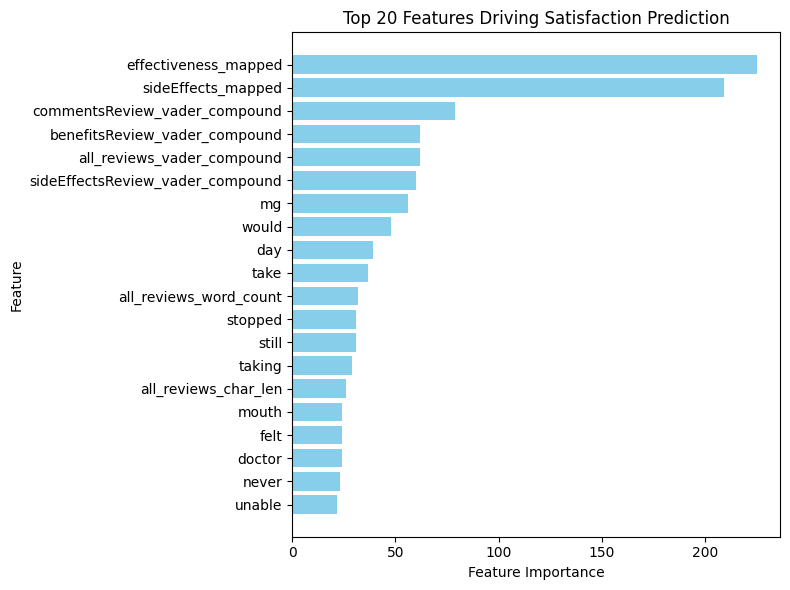

In [15]:
# Feature Importance Visualization
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get top 20 features
importances = lgb_clf.feature_importances_
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(8,6))
plt.barh(feat_imp_df['feature'][::-1], feat_imp_df['importance'][::-1], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features Driving Satisfaction Prediction')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3456694083.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sent, x='Aspect', y='Sentiment', palette='coolwarm')


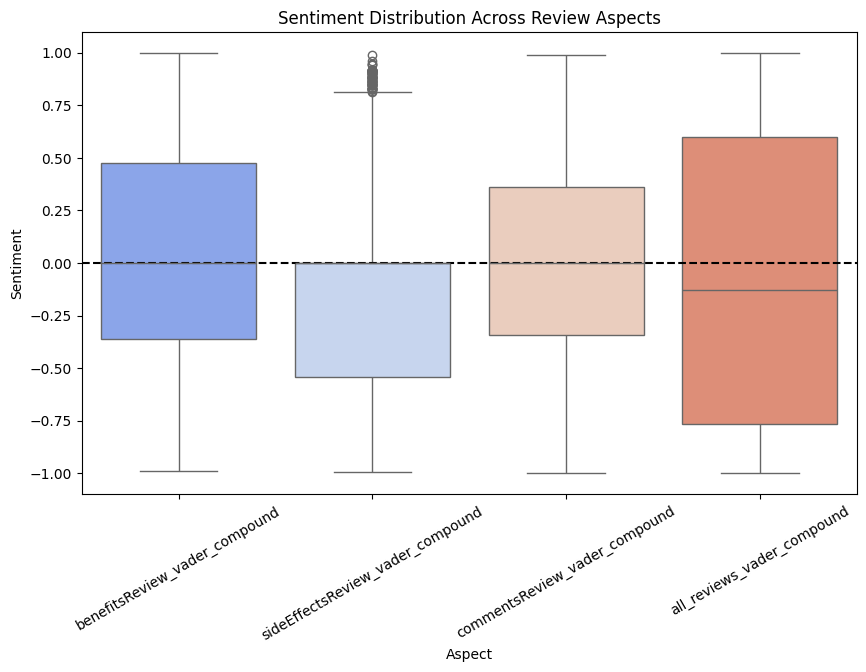

In [16]:
# Sentiment distribution across aspects
import seaborn as sns
plt.figure(figsize=(10,6))
sent_cols = [
    "benefitsReview_vader_compound",
    "sideEffectsReview_vader_compound",
    "commentsReview_vader_compound",
    "all_reviews_vader_compound"
]
df_sent = df[sent_cols].melt(var_name='Aspect', value_name='Sentiment')
sns.boxplot(data=df_sent, x='Aspect', y='Sentiment', palette='coolwarm')
plt.axhline(0, color='black', linestyle='--')
plt.title('Sentiment Distribution Across Review Aspects')
plt.xticks(rotation=30)
plt.show()


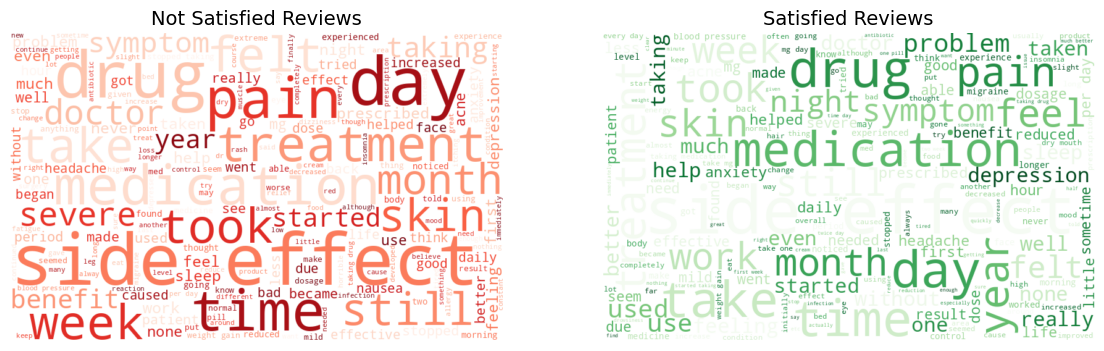

In [17]:
# Word clouds for Satisfied vs Not Satisfied
from wordcloud import WordCloud
import matplotlib.pyplot as plt

satisfied_text = " ".join(df[df['satisfied']==1]['all_reviews_clean'].dropna().tolist())
not_satisfied_text = " ".join(df[df['satisfied']==0]['all_reviews_clean'].dropna().tolist())

wc_params = dict(width=800, height=500, background_color="white", max_words=200)

wc_satisfied = WordCloud(**wc_params, colormap='Greens').generate(satisfied_text)
wc_unsatisfied = WordCloud(**wc_params, colormap='Reds').generate(not_satisfied_text)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(wc_unsatisfied, interpolation="bilinear")
plt.axis("off")
plt.title("Not Satisfied Reviews", fontsize=14)
plt.subplot(1,2,2)
plt.imshow(wc_satisfied, interpolation="bilinear")
plt.axis("off")
plt.title("Satisfied Reviews", fontsize=14)
plt.show()


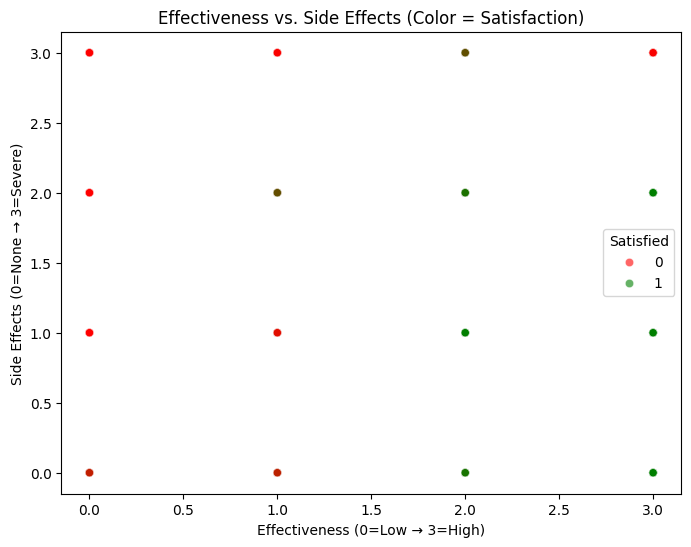

In [18]:
# Brand health visualization (effectiveness vs side effects)
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="effectiveness_mapped",
    y="sideEffects_mapped",
    hue="satisfied",
    palette={1:"green",0:"red"},
    alpha=0.6
)
plt.title("Effectiveness vs. Side Effects (Color = Satisfaction)")
plt.xlabel("Effectiveness (0=Low → 3=High)")
plt.ylabel("Side Effects (0=None → 3=Severe)")
plt.legend(title="Satisfied")
plt.show()
